In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
import random

In [23]:
np.random.seed(0)


In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [26]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

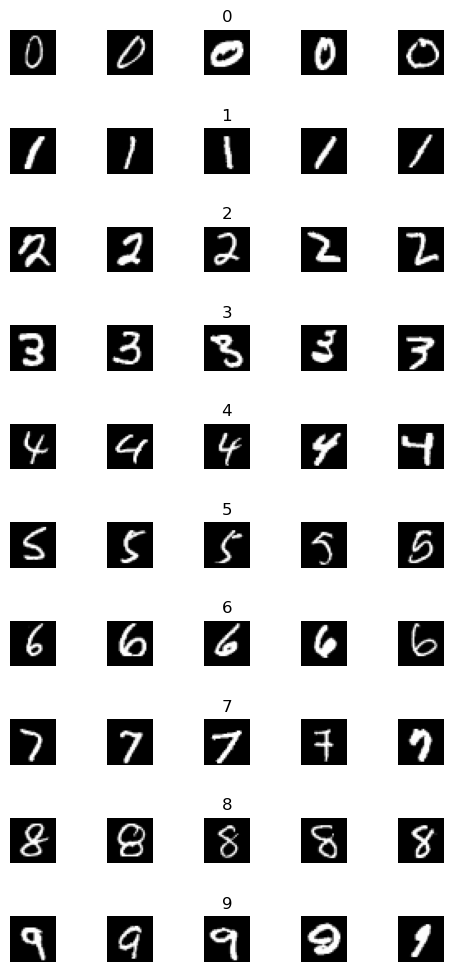

In [27]:
num_of_samples = []

cols =5
num_classes = 10

fig,axs =plt.subplots(num_classes, cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

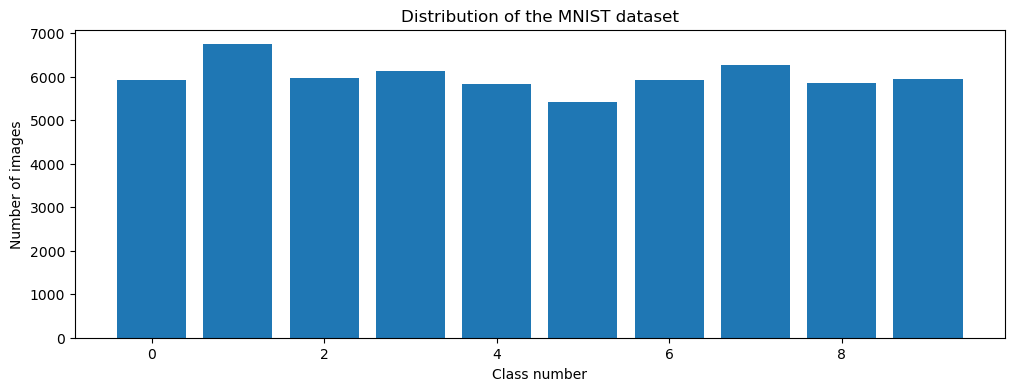

In [28]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the MNIST dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [29]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
num_of_pizzles = 784
X_train = X_train.reshape(X_train.shape[0], num_of_pizzles)
X_test = X_test.reshape(X_test.shape[0], num_of_pizzles)
print(X_train.shape)

(60000, 784)


In [32]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_of_pizzles, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
model = create_model()
print(model.summary())

/home/anonymous/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [34]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=2, shuffle=1)

Epoch 1/10
270/270 - 1s - 5ms/step - accuracy: 0.7479 - loss: 0.7538 - val_accuracy: 0.8962 - val_loss: 0.3574
Epoch 2/10
270/270 - 0s - 1ms/step - accuracy: 0.8896 - loss: 0.3830 - val_accuracy: 0.9150 - val_loss: 0.2914
Epoch 3/10
270/270 - 0s - 1ms/step - accuracy: 0.9056 - loss: 0.3255 - val_accuracy: 0.9143 - val_loss: 0.2884
Epoch 4/10
270/270 - 0s - 1ms/step - accuracy: 0.9146 - loss: 0.2931 - val_accuracy: 0.9322 - val_loss: 0.2346
Epoch 5/10
270/270 - 0s - 1ms/step - accuracy: 0.9196 - loss: 0.2749 - val_accuracy: 0.9325 - val_loss: 0.2321
Epoch 6/10
270/270 - 0s - 2ms/step - accuracy: 0.9224 - loss: 0.2642 - val_accuracy: 0.9332 - val_loss: 0.2272
Epoch 7/10
270/270 - 0s - 1ms/step - accuracy: 0.9274 - loss: 0.2510 - val_accuracy: 0.9308 - val_loss: 0.2356
Epoch 8/10
270/270 - 0s - 2ms/step - accuracy: 0.9279 - loss: 0.2483 - val_accuracy: 0.9385 - val_loss: 0.2147
Epoch 9/10
270/270 - 0s - 1ms/step - accuracy: 0.9310 - loss: 0.2387 - val_accuracy: 0.9355 - val_loss: 0.2217
E

Text(0.5, 0, 'epoch')

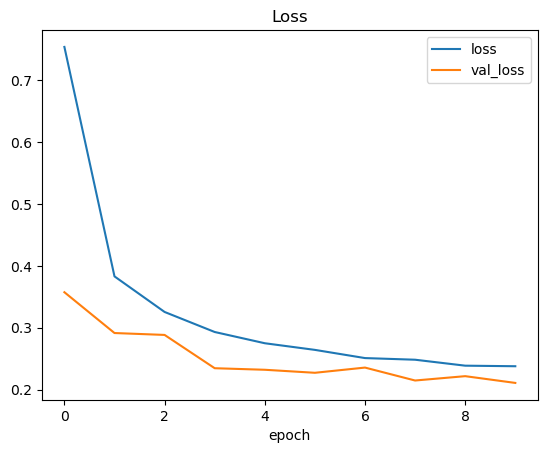

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss']) 
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

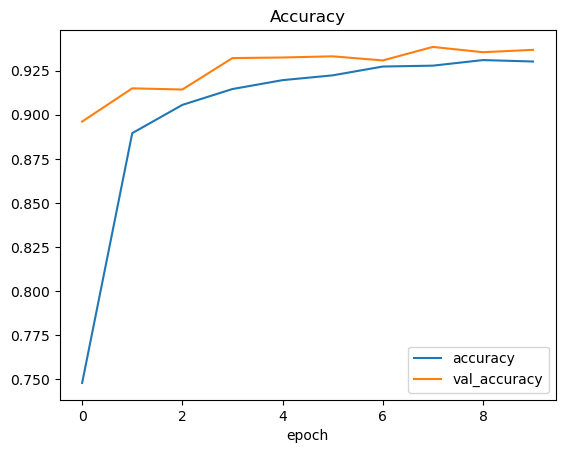

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy']) 
plt.title('Accuracy')
plt.xlabel('epoch')

In [37]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2498595416545868
Test accuracy: 0.9284999966621399


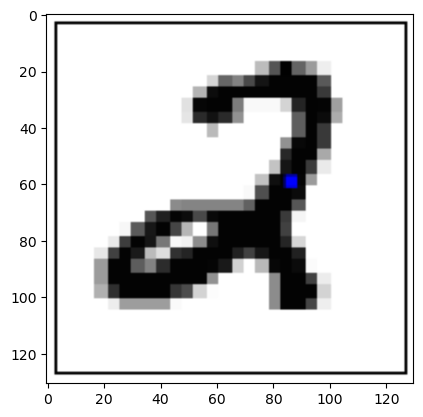

In [44]:
import requests
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img=Image.open(response.raw)
plt.imshow(img)

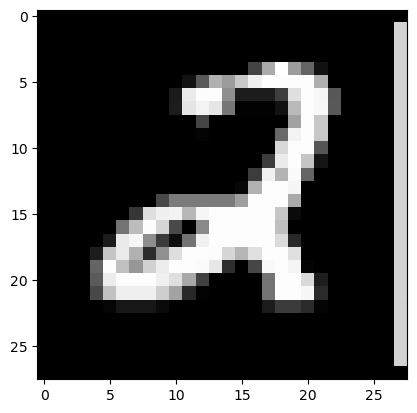

In [39]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
gray_scale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img =cv2.bitwise_not(gray_scale)
plt.imshow(img, cmap=plt.get_cmap("gray"))

In [40]:
img = img/255
img = img.reshape(1, 784)

In [41]:
prediction = np.argmax(model.predict(img), axis=-1)
print("predicted digit:", str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted digit: [2]
